# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('evaluation-data.csv')
results.head()

,actual,prob
0,1.0,0.650790
1,1.0,0.772166
2,1.0,0.647421
3,1.0,0.612818
4,1.0,0.596953


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

# Question 1
- Determine the distribution of the actual event.
- Would you be concern about bias due to imbalance?

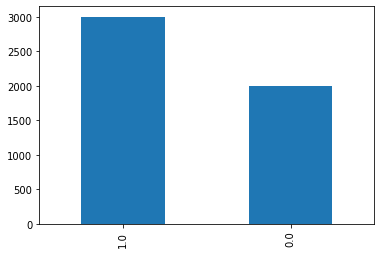

In [2]:
results['actual'].value_counts().plot.bar()
plt.show()

The is a modest amount of imbalance, but likely not enough that it would cause issues in the modeling. Accuracy will be slightly bias, so another measure may be more useful.

# Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

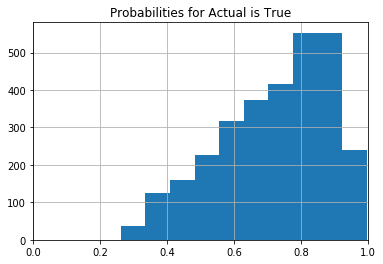

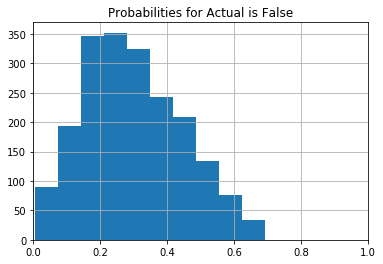

In [3]:
results.query('actual == 1')['prob'].hist()
plt.title('Probabilities for Actual is True')
plt.xlim((0,1))
plt.show()

results.query('actual == 0')['prob'].hist()
plt.title('Probabilities for Actual is False')
plt.xlim((0,1))
plt.show()

There is a range of probabilities for each value in the target. There will be some level of misclassification using the traditional thresholds. However, the model in general to be relatively good in discriminating between the true and false values.

# Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [4]:
results['predicted'] = np.where(results['prob'] >= 0.5, 1, 0)

results.pivot_table(index='actual', columns='predicted', values='actual', aggfunc='count')

predicted,0,1
actual,,
0.0,1790,210
1.0,377,2623


The diagonal contains the vast majority of the values, which means the accuracy will be high. As expected, there are misclassified examples, however, the overall accuracy seems quite good.

# Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model?

In [5]:
accuracy = results.query('predicted == actual').shape[0] / results.shape[0]
accuracy

0.8826

In [6]:
precision = results.query('actual == 1 and predicted == 1').shape[0] / results.query('(actual == 1 and predicted == 1) or (actual == 0 and predicted == 1)').shape[0]
precision

0.9258736321920226

In [7]:
from sklearn.metrics import precision_score

precision_score(results['actual'], results['predicted'])

0.9258736321920226

In [8]:
recall = results.query('actual == 1 and predicted == 1').shape[0] / results.query('actual == 1').shape[0]
recall

0.8743333333333333

In [9]:
from sklearn.metrics import recall_score

recall_score(results['actual'], results['predicted'])

0.8743333333333333

I would probably use recall as there is slight imbalance in the data. However, I would want to know if there was asymmetry in costs for false positives and false negatives, as I may lean to precision in that case.

# Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

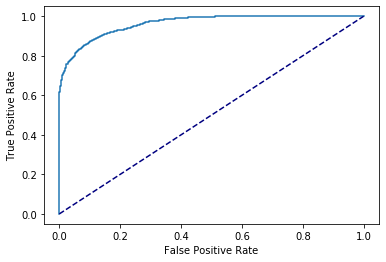

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, thr = roc_curve(results['actual'], results['prob'])

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

The ROC curve shows a good trade-off in the true positive rate and false positive rate beginning near a threshold of about 20%. Overall, it is far from the diagonal, which means it has good discrimination. The ROC reinforces the statistics we calculated that shows this does a reasonable job at classifying the event.